# Exercise 14: Mediation

This homework assignment is designed to give you practice with mediation. You won't need to load in any data for this homework -- we'll simulate data instead.

---
## 1. Simulating data (3 points)


In this homework, we're going to simulate the relationship between age, word reading experience, and reading comprehension skill. Older children tend to be better at reading comprehension tasks, but this isn't just an inherent part of getting older. It's a combination of gaining more experience with reading, oral language skills, and executive functions development. In this homework, though, we're going to simplify this relationship down to a direct effect of age on reading comprehension (since improvements in oral language skills and executive functions are more guaranteed as children age than reading practice is), and a mediation of word reading experience.

In graphical form: 
![picture](https://drive.google.com/uc?id=1wdm9xuiJhBJor99-9GnicO2_rzkGWtfN)

Writing the relationship out formally: 

$$x = \beta_{xa} a + \beta_{x0} + \epsilon_{x}$$

$$c = \beta_{ca} a + \beta_{cx} x + \beta_{c0} + \epsilon_c$$



$c$ is reading comprehension, $x$ is word reading experience, and $a$ is age. $\beta_{c0}$ and $\beta_{x0}$ are intercept terms for their respective formulas, and $\epsilon_{c}$ and $\epsilon_{x}$ are gaussian noise terms. We'll start by writing a function, `simulate_data`, that can simulate this relationship. The input values are set and the function structure is provided below. Complete the function such that it takes in those input variables and generates $age$, $x$, and $c$ values. Use `runif()` to generate ages. Use `rnorm()` to generate the noise terms. 

In [10]:
sample_size = 100 # How many children in data set? 
age_lo = 80     # minimum age, in months
age_hi = 200    # maximum age, in months
beta_xa = 0.5   # amount by which experience changes for increase of one month in age
beta_x0 = -5    # amount of experience when age = 0 (not interpretable, since minimum age for this data is 80 months)
sd_x = 50       # standard dev of gaussian noise term, epsilon_x
beta_ca = 0.8   # amount that comprehension score improves for every increase of one unit in age
beta_cx = 3     # amount that comprehension score improves for every increase of one unit in reading experience
beta_c0 = 10    # comprehension score when reading experience is 0. 
sd_c = 85      # standard dev of gaussian noise term, epsilon_c

simulate_data <- function(sample_size, age_lo, age_hi, beta_xa, 
                          beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c) {
      "
      Simulates the relationships between reading comprehension, word reading
      experience, and age (in months). 

      Returns:
        df: A data frame with three columns, age, x, and c
      
      "
      age <- runif(sample_size, age_lo, age_hi)
      x <- (beta_xa * age) + beta_x0 + rnorm(sample_size, mean = 0, sd = sd_x)
      c <- (beta_ca * age) + (beta_cx * x) + beta_c0 + rnorm(sample_size, mean = 0, sd = sd_c)
      df <- data.frame(cbind(age, x, c))
      return(df)
      
}

dat <- simulate_data(sample_size, age_lo, age_hi, beta_xa, beta_x0, sd_x, beta_ca, beta_cx, beta_c0, sd_c)
head(dat)

,age,x,c
,<dbl>,<dbl>,<dbl>
1,158.2067,41.59597,134.7926
2,104.3645,-69.02745,-147.4049
3,108.8482,98.61969,322.1408
4,179.8060,108.22251,421.0642
5,149.3987,105.65945,337.4145
6,159.3398,146.84775,689.6037


---
## 2. Visualizing Data (2 point)

Load the `tidyverse` library.

In [1]:
# WRITE YOUR CODE HERE
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



a) Plot the relationship between age and reading comprehension. 

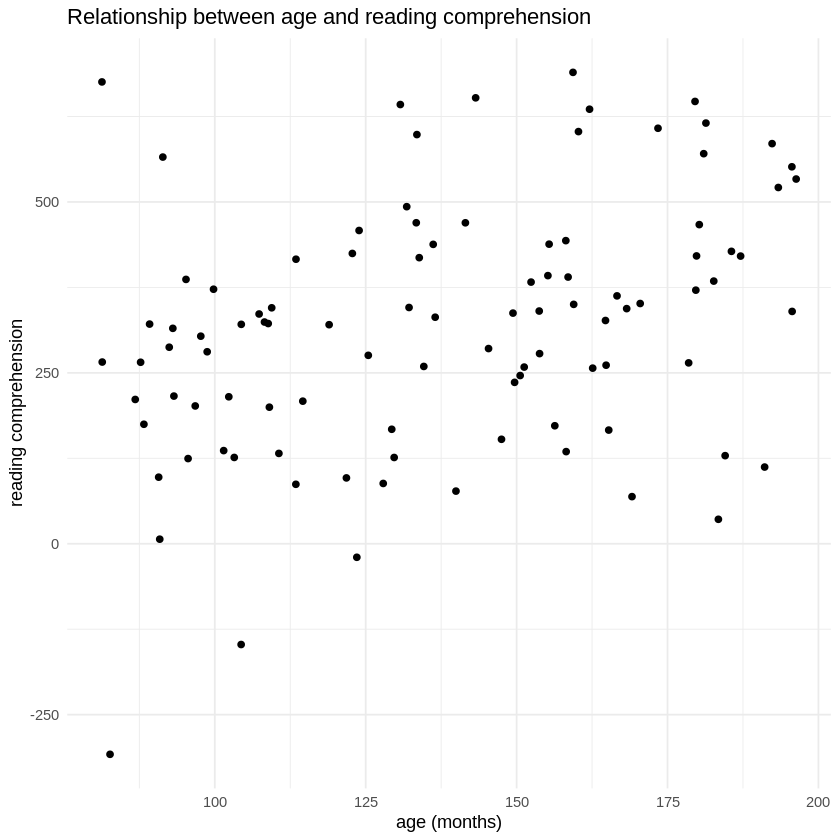

In [12]:
# WRITE YOUR CODE HERE
ggplot(dat, aes(age, c)) +
  geom_point() + 
  theme_minimal() +
  labs(title = 'Relationship between age and reading comprehension', 
    x = 'age (months)', y = 'reading comprehension')

b) Plot the relationship between reading experience, age, and reading comprehension.

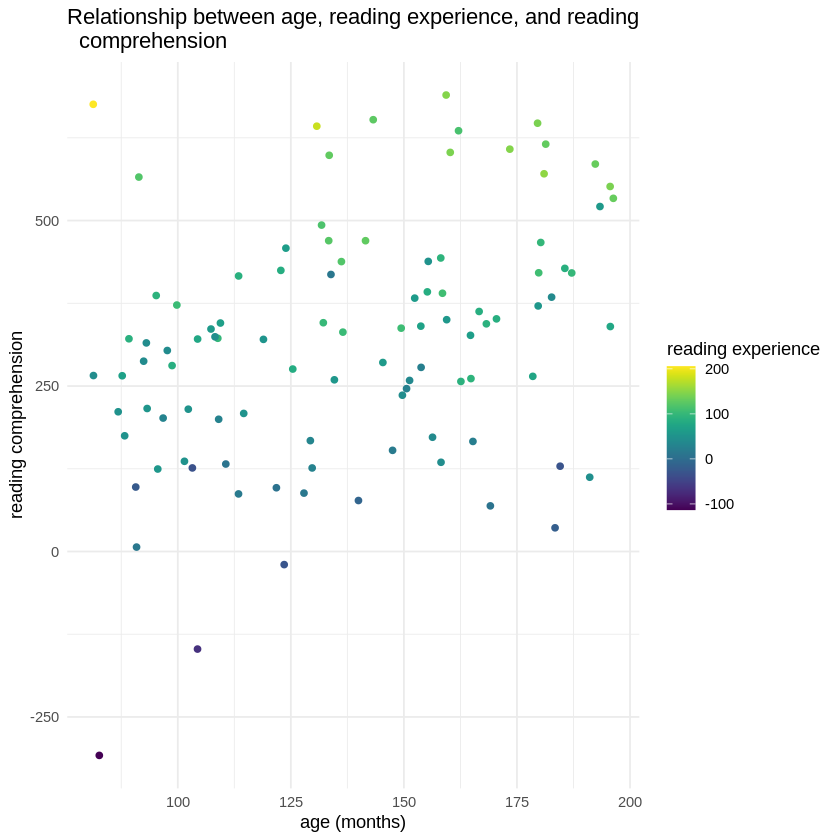

In [28]:
# WRITE YOUR CODE HERE
library(viridis) # for better color palette

ggplot(dat, aes(age, c, color = x)) +
  geom_point() + 
  theme_minimal() +
  scale_color_viridis(option = "D") +
  labs(title = 'Relationship between age, reading experience, and reading 
  comprehension', x = 'age (months)', y = 'reading comprehension', 
  color = 'reading experience')

---
## 3. Mediation Analysis (4 points)

Load the `mediation` library.

In [15]:
# WRITE YOUR CODE HERE
#install.packages('mediation')
library(mediation)

Use the `mediate` function to determine whether `x` mediates the relationship between `age` and `c`. Use `summary()` to print the model results. *Hint: see the mediation and moderation tutorial.*

In [23]:
# WRITE YOUR CODE HERE

# fit M ~ IV, DV ~ M + IV
fitM <- lm(x ~ age, data=dat) 
fitY <- lm(c ~ x + age, data=dat) 
summary(fitM)
summary(fitY)

# run mediation analysis
fit_mediate <- mediate(fitM, fitY, treat = 'age', mediator = 'x')
summary(fit_mediate)


Call:
lm(formula = x ~ age, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-156.056  -31.756    2.299   37.050  163.289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   7.9736    21.4176   0.372  0.71048   
age           0.4221     0.1510   2.796  0.00623 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.65 on 98 degrees of freedom
Multiple R-squared:  0.07386,	Adjusted R-squared:  0.06441 
F-statistic: 7.816 on 1 and 98 DF,  p-value: 0.006234



Call:
lm(formula = c ~ x + age, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-173.37  -48.76  -16.43   55.73  263.64 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.7303    34.5915   0.917   0.3613    
x             3.0340     0.1630  18.609   <2e-16 ***
age           0.6231     0.2532   2.461   0.0156 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 81.75 on 97 degrees of freedom
Multiple R-squared:  0.8077,	Adjusted R-squared:  0.8037 
F-statistic: 203.7 on 2 and 97 DF,  p-value: < 2.2e-16



Causal Mediation Analysis 

Quasi-Bayesian Confidence Intervals

               Estimate 95% CI Lower 95% CI Upper p-value    
ACME              1.262        0.370         2.15   0.002 ** 
ADE               0.622        0.154         1.09   0.006 ** 
Total Effect      1.884        0.901         2.86   0.002 ** 
Prop. Mediated    0.672        0.374         0.90  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Sample Size Used: 100 


Simulations: 1000 


---
## 5. Reflection (1 point)
How do you interpret these results? Why do you think the analysis yielded this result?

> Based on the results of the fitted lm() models and the mediation analysis, I would conclude that the relationship between age and reading comprehension ability is mediated, but not fully mediated by word reading experience. This is reflected by both the indirect (ACME) and direct (ADE) effects being significant in the mediation analysis. Based on the visualization of these relationships, it is clear that the association betweeen age and word reading experience is not nearly as strong as the relationship between word reading experience and reading comprehension. It is possible that the indirect effect would be even stronger if the association between age and word reading experience were stronger.

**DUE:** 5pm EST, April 3, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*